## Метод двойственных усреднений

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import approx_fprime
from numpy.linalg import norm
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['figure.figsize'] = (16, 10)

In [6]:
Y0     = 0
# Alpha = 1/(2L)
ALPHA  = 1/72
STEP   = 0.1

In [7]:
#implementation
def DualAveraging(target, x0, eps, set_type = "rn", grad = approx_fprime, scalar_step = lambda k: STEP):
    index = 0
    y_new    = Y0
    grad_sum = np.zeros((len(x0),))
    xk = [x0]
    
    while True :
        index += 1
        grad_sum += grad(xk[index - 1], target, 0.000001)*scalar_step(index)
        y_old = y_new
        
        if set_type == "rn" :
            xk.append(-1/2*grad_sum)
        elif set_type == "simplex" :
            xk.append(np.exp(-(np.ones(len(x0)) + grad_sum)))
        else :
            print("you oblazhalsya! (rn and simplex are available only)")
            return xk

        y_new = ALPHA*xk[index] + (1 - ALPHA)*y_old
        
        if norm(y_new - y_old, ord = 2) <= eps :
            return xk

### Исследуем метод на сходимость и характер приближения к решению
Будем рассматривать 2-мерное пространство для удобства визуализации, шаг метода пока считаем постоянным

In [14]:
A = np.array([[1, 2], [2, 3]])
b = np.array([1, 2])
x_expl = np.array([1, 0])
x0_rn = np.array([0.1, 0.2])
x0_smp = np.array([0.1, 0.2])
eps = 0.0001

# ||Ax - b||^2
def func1(x):
    return np.linalg.norm(np.dot(A, x) - b, ord = 2)**2

# ||Ax - b||
def func2(x):
    return np.linalg.norm(np.dot(A, x) - b, ord = 2)


def gradFunc1(x, func1, eps = 0) :
    return 2*A.transpose() @ (A @ x - b)

def gradFunc2(x, func2, eps = 0) :
    if np.array_equal(A @ x - b, np.zeros((len(b)))) :
        return 0
    else :
        return A.transpose() @ (A @ x - b) / norm(A @ x - b, ord = 2)

#### Построим траекторию сходимости метода для ф-ции ||Ax - b||^2 для Rn и симплекса

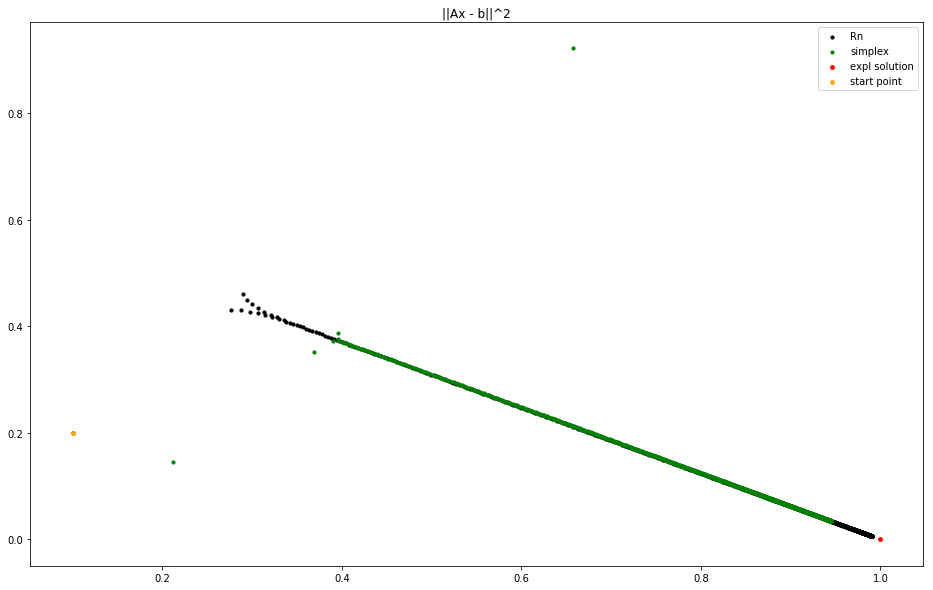

In [20]:
xk_rn      = DualAveraging(func1, x0_rn,  eps, set_type = "rn",      grad = gradFunc1)
xk_simplex = DualAveraging(func1, x0_smp, eps, set_type = "simplex", grad = gradFunc1)

plt.scatter([xk_rn[i][0] for i in range(0, len(xk_rn))], [xk_rn[i][1] for i in range(0, len(xk_rn))], color = "black", label = "Rn", s=10)
plt.scatter([xk_simplex[i][0] for i in range(0, len(xk_simplex))], [xk_simplex[i][1] for i in range(0, len(xk_simplex))], color = "green", label = "simplex", s=10)
plt.scatter(x_expl[0], x_expl[1], label = "expl solution", color = "red", s = 14)
plt.scatter(x0_rn[0], x0_rn[1], label = "start point", color = "orange", s = 14)
plt.title("||Ax - b||^2")
plt.legend()

#### Построим график :
$$lnDiff(k) = \ln\left(\frac{f(x_k) - f(x_*)}{f(x_0) - f(x_*)}\right)$$

In [16]:
def ln_diff(x):
    return np.log((func1(x) - func1(x_expl))/(func1(x0_rn) - func1(x_expl)))

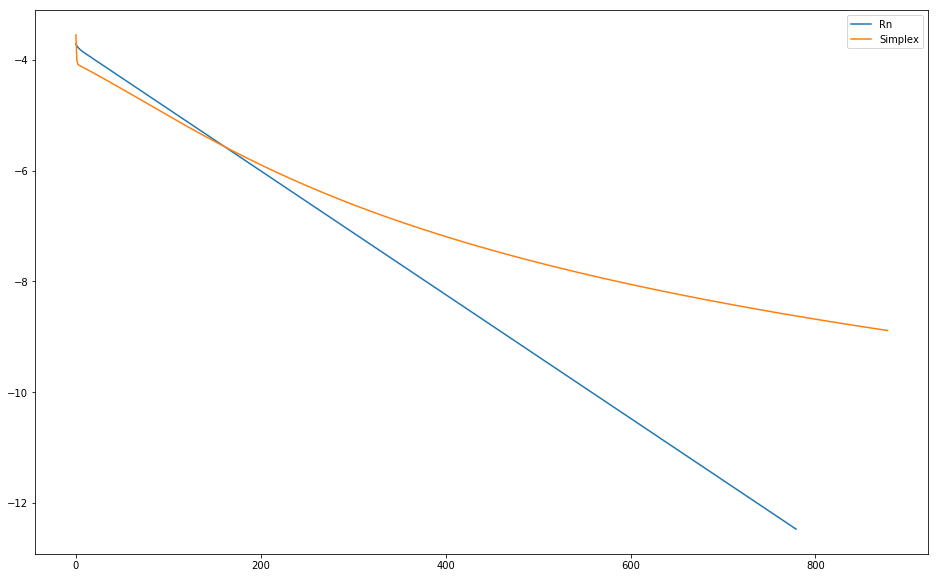

In [23]:
plt.plot([ln_diff(xk_rn[i]) for i in range(3, len(xk_rn))], label = "Rn")
plt.plot([ln_diff(xk_simplex[i]) for i in range(3, len(xk_simplex))], label = "Simplex")
plt.legend()

Для ф-ции ||Ax - b|| метод не сходится (зацикливается в малой окрестности решения, не достигая нужной точности)